# Problema 1

1 - Instalar paquete para leer librerías

In [1]:
if (!require("readr")) install.packages("readr")
library(readr)

Loading required package: readr



Instalar paquetes para manipular y transformar los datos

In [2]:
if (!require("dplyr")) install.packages("dplyr")
library(dplyr)
if (!require("tidyr")) install.packages("tidyr")
library(tidyr)
if(!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: ggplot2



Cargar datasets:

In [3]:
datos_habitantes <- read_csv("HAVD_Exo02.csv")
head(datos_habitantes)

Rows: 74 Columns: 104
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): Dte., Barris
dbl (102): TOTAL, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Dte.,Barris,TOTAL,0,1,2,3,4,5,6,⋯,91,92,93,94,95,96,97,98,99,100
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BARCELONA,NA,1625137,13633,13918,13712,13533,14018,13968,13801,⋯,4528,3761,2923,2309,1658,1223,827,565,398,767
1,1. el Raval,47986,449,431,409,396,457,475,462,⋯,91,67,50,30,30,20,12,9,2,12
1,2. el Barri Gòtic,16240,99,97,93,88,99,97,89,⋯,38,36,27,25,11,9,11,3,0,11
1,3. la Barceloneta,15101,94,100,86,101,80,71,86,⋯,30,37,29,15,15,12,6,3,5,5
1,"4. Sant Pere, Santa Caterina i la Ribera",22923,177,168,166,145,166,164,145,⋯,38,42,31,28,12,9,6,8,5,14
2,5. el Fort Pienc,32048,251,266,268,240,281,238,262,⋯,106,73,75,49,44,31,17,16,7,14


### 1. Representar un histograma con la distribución de la población de la ciudad por edades

Una vez que tengo los datos guardados en la variable datos_habitantes, veo que existe una variable llamada Barcelona, que representa la suma de todos los habitantes de cada barrio.

Guardo en una variable los datos de la primera fila, pero solo aquellos que necesito para construir el histograma.

In [4]:
datos_barcelona <- datos_habitantes %>% slice(1)
datos_barcelona <- datos_barcelona %>% select(4:last_col())
datos_barcelona

0,1,2,3,4,5,6,7,8,9,⋯,91,92,93,94,95,96,97,98,99,100
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13633,13918,13712,13533,14018,13968,13801,13747,14288,13588,⋯,4528,3761,2923,2309,1658,1223,827,565,398,767


A continuación, coloco las variables en formato vertical, de modo que una columna contenga las **edades** y la otra la **cantidad de población** correspondiente.

In [5]:
datos_barcelona_horizontal <- datos_barcelona %>%
    pivot_longer(
    cols = everything(), 
    names_to = "Edad", 
    values_to = "Poblacion" 
  )
head(datos_barcelona_horizontal)

Edad,Poblacion
<chr>,<dbl>
0,13633
1,13918
2,13712
3,13533
4,14018
5,13968


La edad esta como string pasemosla a numérico.

In [6]:
datos_barcelona_horizontal<- datos_barcelona_horizontal %>% mutate(Edad = as.numeric(Edad))
head(datos_barcelona_horizontal)

Edad,Poblacion
<dbl>,<dbl>
0,13633
1,13918
2,13712
3,13533
4,14018
5,13968


Ahora puedo hacer el plot de la gráfica correctamente:

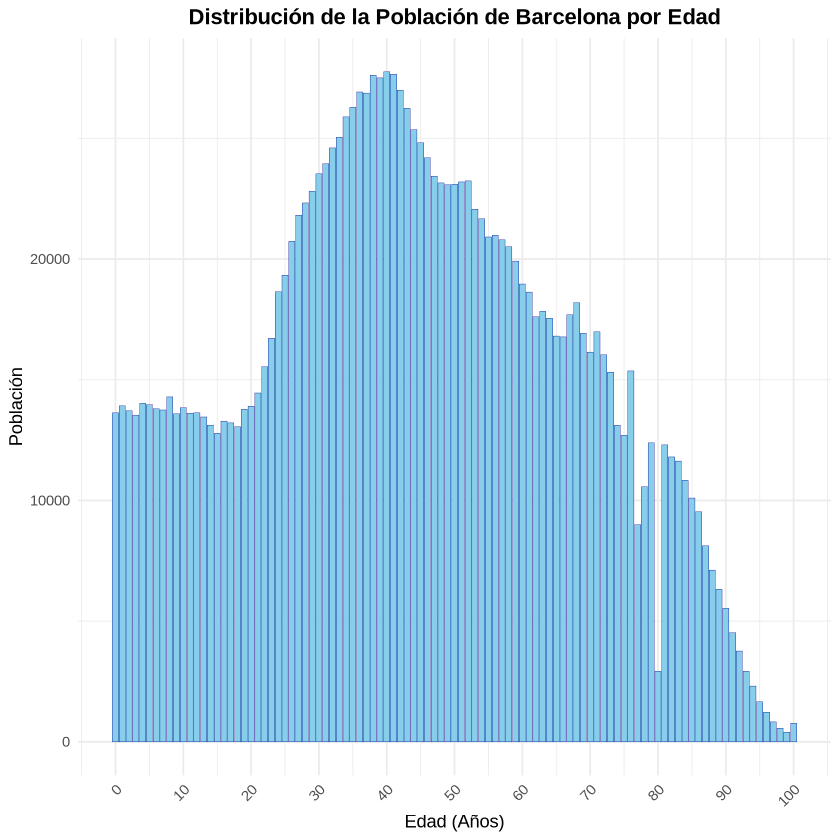

In [7]:
ggplot(datos_barcelona_horizontal, aes(x = Edad, y = Poblacion)) +
  geom_col(fill = "skyblue", color = "darkblue", linewidth = 0.1) +
  labs(
    title = "Distribución de la Población de Barcelona por Edad",
    x = "Edad (Años)",
    y = "Población"
  ) +
  scale_x_continuous(breaks = seq(0, 100, 10)) + # Mostrar ticks cada 5 años
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

**Comentario:**  
Se observa una población madura, donde la mayoría de las personas se encuentran entre los 37 y 45 años aproximadamente. Esto podría deberse al *baby boom*.  
También se observa que, entre los 0 y 20 años, la población se ha mantenido estable y, como es habitual, a partir de los 70 u 80 años la población va disminuyendo.  
El valle que se aprecia alrededor de los 80 años podría deberse a un error en la captación de la edad en los datos.

### 2.-Representar un boxplot para la distribución de edades de la ciudad.

Para hacer esta gráfica, ncecesito a los datos de los individuos que componen la frecuencia de población es decir, los datos que se nos han dado es cuantos individuos tienen 0 años, 1 año etc... voy ha crear una lista con todos los individuos.

In [8]:
individuos_barcelona <- rep(
    x = datos_barcelona_horizontal$Edad,
    times = datos_barcelona_horizontal$Poblacion
)
head(individuos_barcelona)

[1] 0 0 0 0 0 0

para crear la tabla:

In [9]:
df_bruto <- data.frame(
  Edad = individuos_barcelona,
  Ciudad = "Barcelona"
)
head(df_bruto)

,Edad,Ciudad
,<dbl>,<chr>
1,0,Barcelona
2,0,Barcelona
3,0,Barcelona
4,0,Barcelona
5,0,Barcelona
6,0,Barcelona


Generamos el box-plot de la tabla:

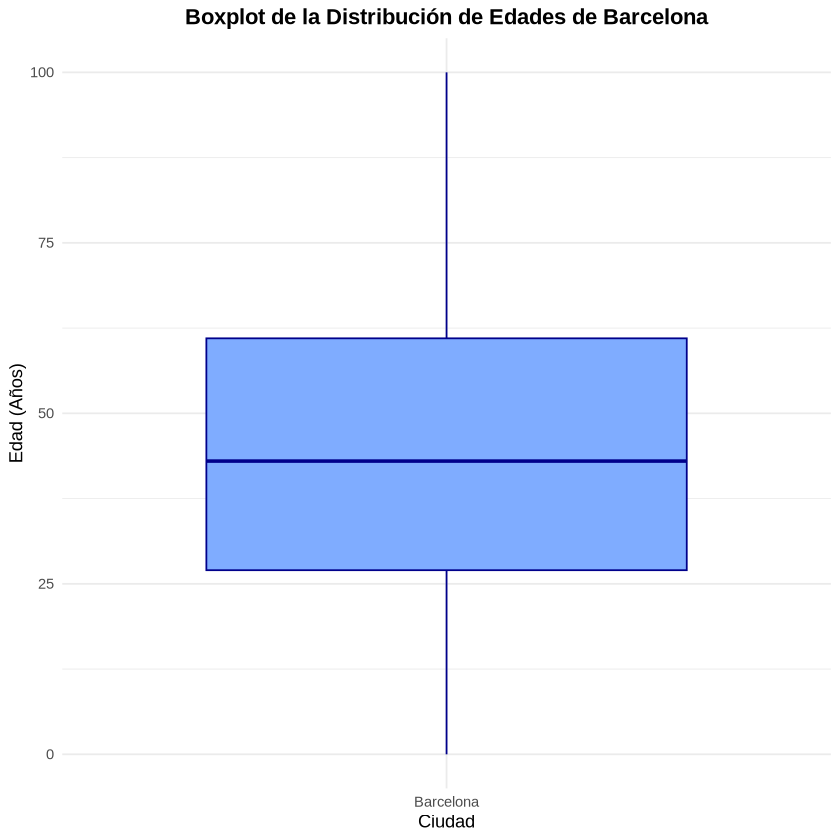

In [10]:
ggplot(df_bruto, aes(x = Ciudad, y = Edad)) +
  
  geom_boxplot(
    fill = "#7facff", 
    color = "darkblue",
    outlier.color = "red", 
    outlier.shape = 4,
    outlier.size = 5
  ) +

  labs(
    title = "Boxplot de la Distribución de Edades de Barcelona",
    x = "Ciudad",
    y = "Edad (Años)"
  ) +
  
  
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
  )

**Comentario:**  
Tiene una forma un poco asimétrica, con un sesgo hacia la derecha, ya que la mediana está más cerca del borde inferior (Q1) que del Q3.  
Esto indica que estamos ante una población madura (en edad de trabajar), con una media algo más joven.  
Luego se observa una cola más larga hacia arriba, lo que sugiere que hay bastante gente mayor.  
No entiendo por qué no se me han mostrado los *outliers*...

### 3.-Calcular la media y la desviación estándar de la distribución de edades de la ciudad.

Para calcular la media lo hago sobre los datos brutos que he creado anteriormente

In [11]:
media <- mean(df_bruto$Edad,na.rm = TRUE)
"media: "
media
desviacion <- sd(df_bruto$Edad,na.rm = TRUE)
"desviación: "
desviacion

[1] "media: "

[1] 43.72695

[1] "desviación: "

[1] 23.10579

**Comentario:**  
Confirma lo que se ha mencionado en los puntos anteriores: una media de 44 años y una desviación de 23, lo que coincide con lo observado en el gráfico de frecuencias.  
Se trata de una población en edad de trabajar.

# Problema 2

Cargo los datos:

In [12]:
if(!require("lubridate")) install.packages("lubridate")
library(lubridate)
ds_halcon <- read_csv("Halcon.csv")
head(ds_halcon)

Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


New names:
• `` -> `...1`
Rows: 891 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): CaptureTime, BandNumber, Species, Age, Sex
dbl  (9): ...1, Month, Day, Year, Wing, Weight, Culmen, Hallux, Tail
time (1): ReleaseTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,19,1992,13:30,NA,877-76317,RT,I,NA,385,920,25.7,30.1,219
3,9,23,1992,12:45,NA,877-76319,RT,I,NA,381,990,26.7,31.3,235
4,9,23,1992,10:50,NA,745-49508,CH,I,F,265,470,18.7,23.5,220
5,9,27,1992,11:15,NA,1253-98801,SS,I,F,205,170,12.5,14.3,157
6,9,28,1992,11:25,NA,1207-55910,RT,I,NA,412,1090,28.5,32.2,230
7,9,28,1992,13:30,NA,877-76320,RT,I,NA,370,960,25.3,30.1,212


De primeras veo variables que estan como tipo de parametro: "chr", capture time tendría que ser tipo fecha y RelaseTime, tendríamos que juntar toda la fecha en una "CaptureTotalTime" y "ReleaseTotalTime" a parte veo que no esta clasificado todos los Sexos del animal, hay datos que "faltan"(son ´NA´), primero de todo voy a poner los datos correctamente, y, una vez hecho esto voy a borrar los que estan duplicados.

In [13]:
ds_halcon_correcto <- ds_halcon %>%
  mutate(
    # Convertir espacios/vacíos en NA
    ReleaseTime = na_if(trimws(ReleaseTime), ""),
    
    # Crear cadenas de texto con las fechas completas, en este caso para ReleaseDateTime_Str si el day es NA el Str total sera NA cosa que me viene perfecto.
    CaptureDateTime_Str = paste(Year, Month, Day, CaptureTime, sep = "-"),
    ReleaseDateTime_Str = paste(Year, Month, Day, ReleaseTime, sep = "-")
  ) %>%
  mutate(
    # Ajustes de variables
    CaptureDateTime = ymd_hm(CaptureDateTime_Str, tz = "UTC"),
    ReleaseDateTime = ymd_hms(ReleaseDateTime_Str, tz = "UTC"),
    Species = as.factor(Species),
    Sex = as.factor(Sex),
    Age = as.factor(Age),    
    
    # Cálculo del tiempo que han estado estudiando a los animalitos
    TimeToStudy = as.numeric(ReleaseDateTime - CaptureDateTime, units = "mins"),
      
  ) %>% # Borro los datos que no necesito
  select(-c(CaptureDateTime_Str, ReleaseDateTime_Str, 1, Month, Day, Year, CaptureTime, ReleaseTime)) # Limpieza
head(ds_halcon_correcto)

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `CaptureDateTime = ymd_hm(CaptureDateTime_Str, tz = "UTC")`.
Caused by warning:
!  1 failed to parse.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,CaptureDateTime,ReleaseDateTime,TimeToStudy
<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>
877-76317,RT,I,NA,385,920,25.7,30.1,219,1992-09-19 13:30:00,NA,NA
877-76319,RT,I,NA,381,990,26.7,31.3,235,1992-09-23 12:45:00,NA,NA
745-49508,CH,I,F,265,470,18.7,23.5,220,1992-09-23 10:50:00,NA,NA
1253-98801,SS,I,F,205,170,12.5,14.3,157,1992-09-27 11:15:00,NA,NA
1207-55910,RT,I,NA,412,1090,28.5,32.2,230,1992-09-28 11:25:00,NA,NA
877-76320,RT,I,NA,370,960,25.3,30.1,212,1992-09-28 13:30:00,NA,NA


Compruebo que se ha hecho bien, ya que he tardado bastante en darme cuenta que el Release time si que venia el dato en tipo "time". 

In [14]:
test <- ds_halcon_correcto %>%
  filter(!is.na(ReleaseDateTime))
test

BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,CaptureDateTime,ReleaseDateTime,TimeToStudy
<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>
2003-58576,SS,I,F,191,157,12.0,13.8,158,1997-09-09 13:06:00,1997-09-09 13:26:00,20
1423-16276,SS,I,M,161,98,10.3,11.7,133,1997-09-10 10:39:00,1997-09-10 10:53:00,14
1387-92127,RT,I,NA,365,813,26.2,30.1,221,1997-09-10 14:35:00,1997-09-10 14:50:00,15
1423-16277,SS,I,M,156,94,9.9,11.4,125,1997-09-11 10:05:00,1997-09-11 10:32:00,27
2003-58577,SS,I,F,191,155,16.5,14.4,158,1997-09-12 11:00:00,1997-09-12 10:20:00,-40
2003-58578,SS,I,F,198,181,12.5,14.1,159,1997-09-14 10:46:00,1997-09-14 11:00:00,14
872-09631,SS,I,M,160,92,9.8,11.0,132,1997-09-14 12:35:00,1997-09-14 12:50:00,15
872-09633,SS,I,M,164,98,10.1,11.4,136,1997-09-17 12:26:00,1997-09-17 13:10:00,44
1387-92128,RT,I,NA,352,1024,26.6,30.3,216,1997-09-17 13:04:00,1997-09-17 13:45:00,41


Veo que hay capturas de releaseTime que se han tomado mal, por eso vamos a poner como NA los TimeToStudy que sean negativos, para que no afecten estos resultados que claramente estan mal tomados.

In [15]:
ds_halcon_correcto <- ds_halcon_correcto %>% 
    mutate(
        TimeToStudy = ifelse(TimeToStudy < 0, NA, TimeToStudy)
    )
test <- ds_halcon_correcto %>%
  filter(!is.na(ReleaseDateTime))
test


BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,CaptureDateTime,ReleaseDateTime,TimeToStudy
<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>
2003-58576,SS,I,F,191,157,12.0,13.8,158,1997-09-09 13:06:00,1997-09-09 13:26:00,20
1423-16276,SS,I,M,161,98,10.3,11.7,133,1997-09-10 10:39:00,1997-09-10 10:53:00,14
1387-92127,RT,I,NA,365,813,26.2,30.1,221,1997-09-10 14:35:00,1997-09-10 14:50:00,15
1423-16277,SS,I,M,156,94,9.9,11.4,125,1997-09-11 10:05:00,1997-09-11 10:32:00,27
2003-58577,SS,I,F,191,155,16.5,14.4,158,1997-09-12 11:00:00,1997-09-12 10:20:00,NA
2003-58578,SS,I,F,198,181,12.5,14.1,159,1997-09-14 10:46:00,1997-09-14 11:00:00,14
872-09631,SS,I,M,160,92,9.8,11.0,132,1997-09-14 12:35:00,1997-09-14 12:50:00,15
872-09633,SS,I,M,164,98,10.1,11.4,136,1997-09-17 12:26:00,1997-09-17 13:10:00,44
1387-92128,RT,I,NA,352,1024,26.6,30.3,216,1997-09-17 13:04:00,1997-09-17 13:45:00,41


por último mirar si hay números identificativos que se repitan....

In [16]:
repes <- ds_halcon_correcto %>% 
  count(BandNumber) %>%                        
  filter(n > 1)
repes

BandNumber,n
<chr>,<int>


No se repiten.

**ya creo que tengo los datos limpios para poder trabajar.**

### 1.- Obtened una visión global de todas las variables y comentadlas.

Para obtener una visión rapida y global utilizaré ña funcion summary y summary por especies

In [17]:
summary(ds_halcon_correcto)

  BandNumber        Species  Age       Sex           Wing      
 Length:891         CH: 69   A:219   F   :170   Min.   : 37.2  
 Class :character   RT:567   I:672   M   :155   1st Qu.:202.0  
 Mode  :character   SS:255           NA's:566   Median :370.0  
                                                Mean   :315.9  
                                                3rd Qu.:390.0  
                                                Max.   :480.0  
                                                               
     Weight           Culmen          Hallux            Tail      
 Min.   :  56.0   Min.   : 8.60   Min.   :  9.50   Min.   :119.0  
 1st Qu.: 185.0   1st Qu.:12.80   1st Qu.: 15.10   1st Qu.:160.0  
 Median : 970.0   Median :25.50   Median : 29.40   Median :214.0  
 Mean   : 771.6   Mean   :21.81   Mean   : 26.41   Mean   :198.9  
 3rd Qu.:1120.0   3rd Qu.:27.35   3rd Qu.: 31.40   3rd Qu.:225.0  
 Max.   :2030.0   Max.   :39.20   Max.   :341.40   Max.   :288.0  
                   

Por especies:

In [18]:
by(ds_halcon_correcto, ds_halcon_correcto$Species, summary)

ds_halcon_correcto$Species: CH
  BandNumber        Species Age      Sex          Wing           Weight      
 Length:69          CH:69   A:31   F   :35   Min.   :145.0   Min.   :  56.0  
 Class :character   RT: 0   I:38   M   :33   1st Qu.:227.0   1st Qu.: 335.0  
 Mode  :character   SS: 0          NA's: 1   Median :240.0   Median : 375.0  
                                             Mean   :244.1   Mean   : 419.6  
                                             3rd Qu.:260.0   3rd Qu.: 505.0  
                                             Max.   :377.0   Max.   :1119.0  
                                                                             
     Culmen          Hallux           Tail     CaptureDateTime              
 Min.   :12.20   Min.   :13.80   Min.   :157   Min.   :1992-09-23 10:50:00  
 1st Qu.:16.00   1st Qu.:19.90   1st Qu.:186   1st Qu.:1997-09-23 11:43:00  
 Median :17.10   Median :21.30   Median :200   Median :2000-09-25 13:18:00  
 Mean   :17.56   Mean   :22.68   Mean

**Observaciones:** 

**1. Observaciones Generales**
* **Especies (Species):**
    * Vemos que hay muchísimas más especies **RT** (*Red-tailed*) que **SS** y **CH**, especialmente de CH donde hay muy pocas.
    * **Implicación:** Los datos en esta especie (CH) pueden no ser tan significativos respecto a los de RT.
* **Edad (Age):**
    * De las especies que han obtenido muchas muestras, hay muchos más ejemplares **Inmaduros** que Adultos.
* **Sexo (Sex):**
    * Muchísimas especies de halcones **no han identificado el sexo (`NA`)**. De las que sí lo han hecho, las muestras están muy a la par.

**(Wing, Weight, Culmen, Hallux, Tail)**

* **Asimetría:** Hay bastante variación entre la **Media** y la **Mediana**. La Media es más pequeña que la Mediana, lo que indica **asimetría negativa** en estas muestras, debido a la mezcla de especies de diferente tamaño.
* **Weight:** Presenta la mayor diferencia y dispersión, lo que subraya la amplia variedad de tamaños.
* **Valores Extremos:** El valor mínimo seguro se debe a una cría o un ejemplar de la especie más pequeña, y el máximo a un ejemplar maduro.
* **Culmen, Hallux y Tail:** Pasa lo mismo que con los anteriores datos, mostrando el mismo patrón de dispersión.

**Si lo separamos por especies**
vemos que los resultados son **más parejos** y en los datos hay **menos varianza**.
* **Ejemplo:** Incluso en alguno como en **CH** en *Weight*, la media está por encima de la mediana.
* **Advertencia:** Como estamos viendo los datos con Maduros e Inmaduros en el mismo "saco", el Máximo y Mínimo de todos los valores es muy diferente en todas las variables, por lo que una segmentación adicional por **Edad** sería beneficiosa.


### 2.-Realizad un estudio de estadística descriptiva de las variables Wing y Tail (Cread tablas de contingencia para cada una de las variables)

Datos basicos mas exaustivos usando el package: "pestecs"

In [19]:
if (!require("pastecs")) install.packages("pastecs")
library(pastecs)

Loading required package: pastecs

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pastecs’”
also installing the dependency ‘boot’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘pastecs’


The following object is masked from ‘package:tidyr’:

    extract


The following objects are masked from ‘package:dplyr’:

    first, last




In [20]:
datos_estudio <- ds_halcon_correcto %>% select(Wing, Tail)

stat.desc(datos_estudio, norm = TRUE)

,Wing,Tail
,<dbl>,<dbl>
nbr.val,8.910000e+02,8.910000e+02
nbr.null,0.000000e+00,0.000000e+00
nbr.na,0.000000e+00,0.000000e+00
min,3.720000e+01,1.190000e+02
max,4.800000e+02,2.880000e+02
range,4.428000e+02,1.690000e+02
sum,2.815092e+05,1.772140e+05
median,3.700000e+02,2.140000e+02
mean,3.159475e+02,1.988934e+02


Aqui puedo ver todas las variables y bueno esto es un poco lo que se ha dicho en el anteriror ejerciio de comentar las variables.

Vamos ha hacer 2 box-plot de cada variable para ver como se distribuyen los datos de una forma mucha mas visual.

**Wing y Tail**

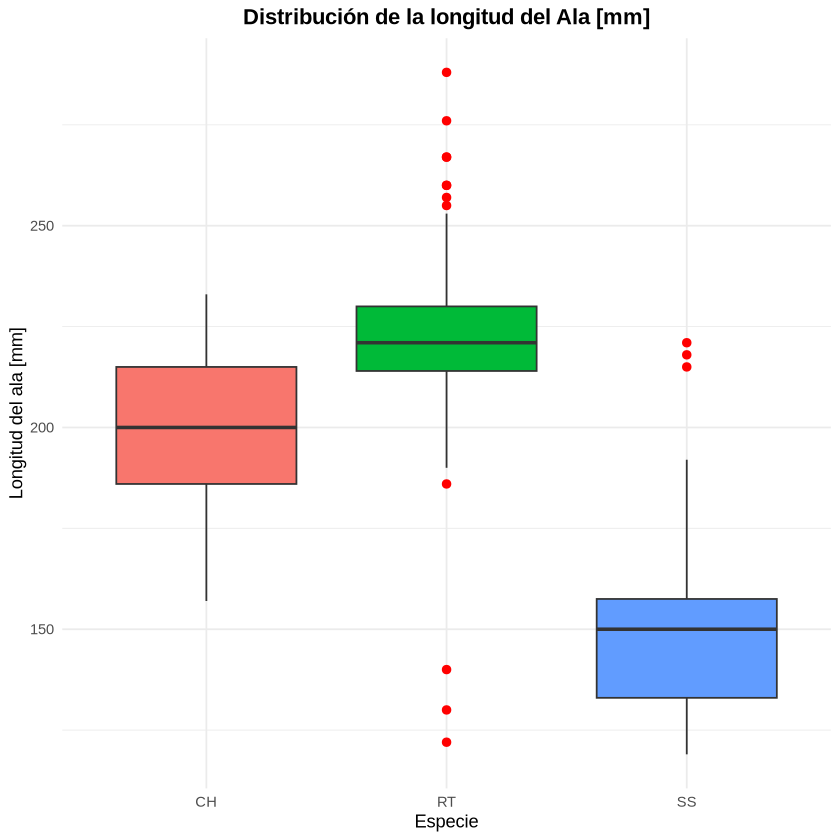

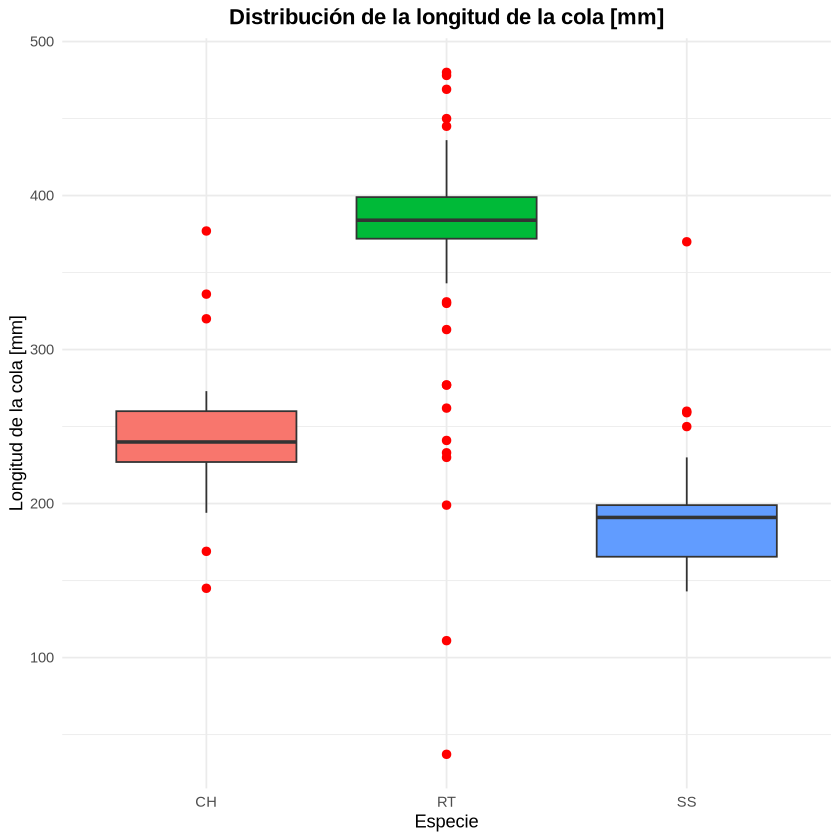

In [21]:
ggplot(ds_halcon_correcto, aes(x = Species, y = Tail, fill = Species)) +
  
  geom_boxplot(
    outlier.color = "red", 
    outlier.size = 2,
    na.rm = TRUE 
  ) +
  
  labs(
    title = "Distribución de la longitud del Ala [mm]",
    x = "Especie",
    y = "Longitud del ala [mm]"
  ) +
  
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "none" 
  )
ggplot(ds_halcon_correcto, aes(x = Species, y = Wing, fill = Species)) +
  
  geom_boxplot(
    outlier.color = "red", 
    outlier.size = 2,
    na.rm = TRUE 
  ) +
  
  labs(
    title = "Distribución de la longitud de la cola [mm]",
    x = "Especie",
    y = "Longitud de la cola [mm]"
  ) +
  
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "none" 
  )

**Comentarios:**  

Se observa una separación clara entre las tres especies (CH, RT, SS). A primera vista, podemos establecer un ranking de tamaño que se mantiene tanto en las alas como en la cola: **RT** es la más grande de todas las especies, **CH** es la intermedia y **SS** es la más pequeña.  

La especie **RT** presenta muchos valores *outliers*; esto puede deberse a una gran diversidad interna o a una clasificación incorrecta de algunos individuos.  

Las especies **CH** y **SS** tienen una caja más ancha, lo que indica una alta variabilidad dentro de su grupo principal.  
La media de **CH** está más cerca de **Q1**, lo que refleja una asimetría negativa (sesgo positivo).  
También se observa que el “bigote” superior es mucho más corto que el inferior, mientras que en **SS** ocurre lo contrario (todos los *outliers* están en la parte superior).  
Este patrón se repite tanto en la cola como en el ala.

Como creo que si son masculinos y femeninos tambien afecta, voy a separar entre estos (tambien ploterar los que son NA):

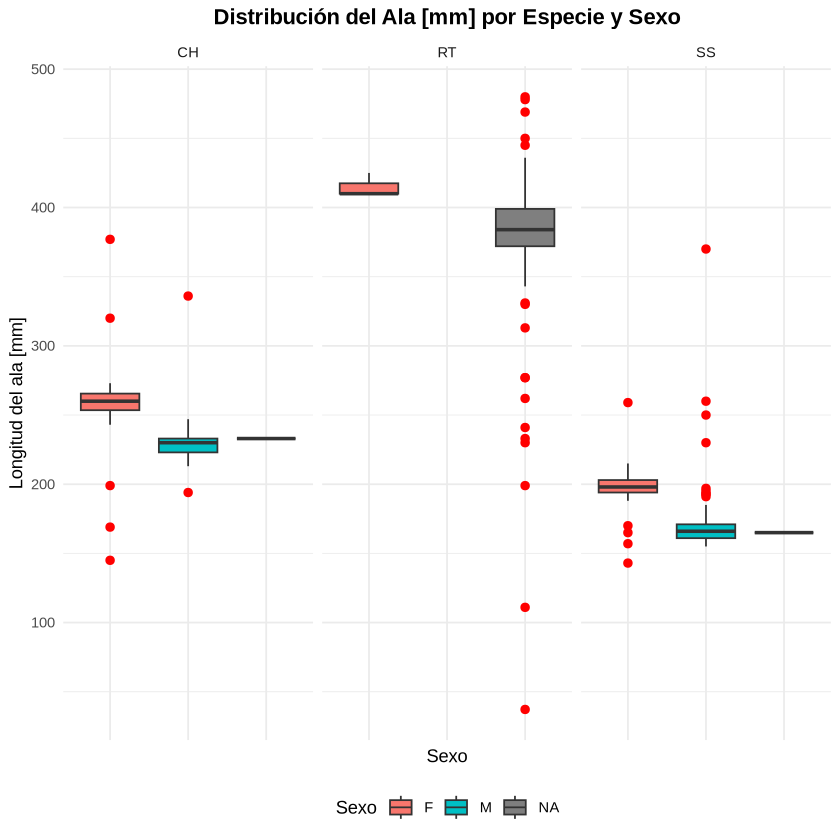

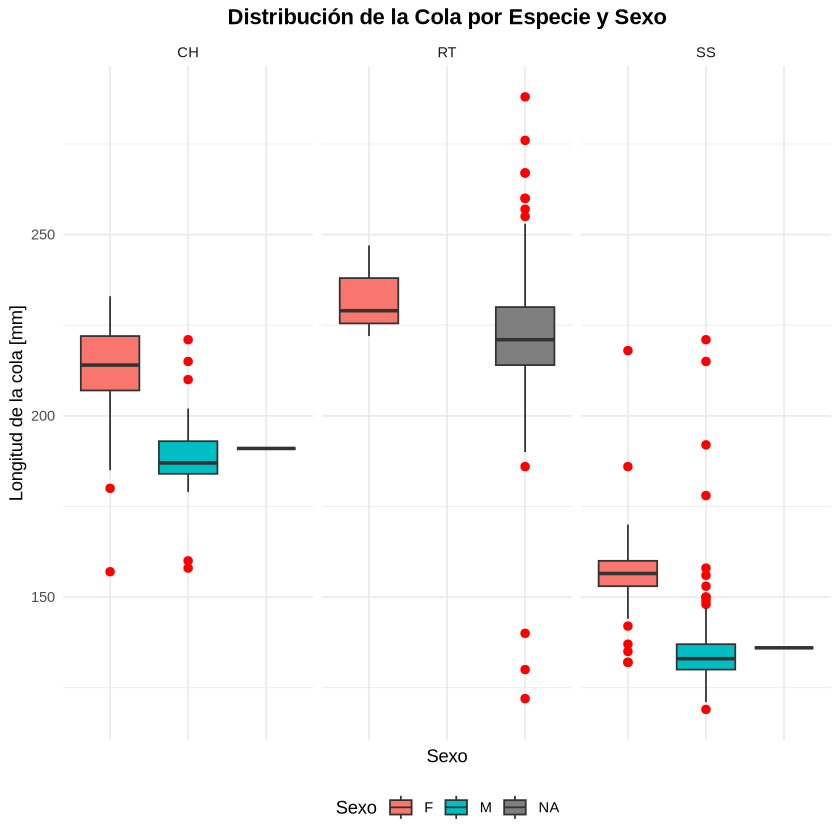

In [22]:
ggplot(ds_halcon_correcto, aes(x = Sex, y = Wing, fill = Sex)) +
  
  geom_boxplot(
    outlier.color = "red",
    outlier.size = 2,
    na.rm = TRUE 
  ) +
  
  facet_wrap(~ Species) +
  
  labs(
    title = "Distribución del Ala [mm] por Especie y Sexo",
    x = "Sexo", 
    y = "Longitud del ala [mm]",
    fill = "Sexo" 
  ) +
  
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "bottom", 
    axis.text.x = element_blank(), 
    axis.ticks.x = element_blank()
  )

ggplot(ds_halcon_correcto, aes(x = Sex, y = Tail, fill = Sex)) +
  
  geom_boxplot(
    outlier.color = "red",
    outlier.size = 2,
    na.rm = TRUE 
  ) +
  
  facet_wrap(~ Species) +
  
  labs(
    title = "Distribución de la Cola por Especie y Sexo",
    x = "Sexo",
    y = "Longitud de la cola [mm]",
    fill = "Sexo" 
  ) +
  
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "bottom",
    axis.text.x = element_blank(), 
    axis.ticks.x = element_blank()
  )

**Comentario:**

Muy interesante esto, lo que normalmente pasa (o esto me parece a mi) es que los machos suelen ser mas grandes que las hembras, aquí esto es al reves, en las 3 especies la hembra es significativamente mas grande que el macho

En la especie RT, los indivíduos no registrados tiene mucha pinta que si siguen el mismo patros que las otras especies, la mayoría son machos no registrados. La gran variabilidad de las graficas anteriores se puede dar a que efectivamente estabamos mezclando los 2 sexos en una misma gráfica.

He investigado un poco y se ve que en las aves es común que las hembras sean mas grandes que los machos (interesante).

Ahora podríamos hacer uno que sea de adulto e inmaduro:

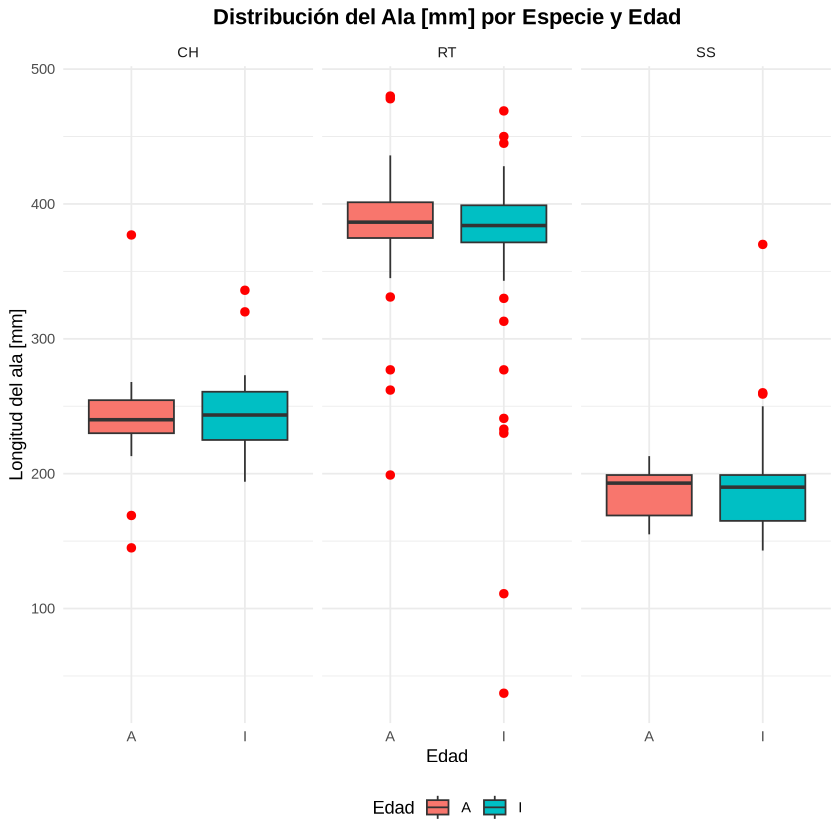

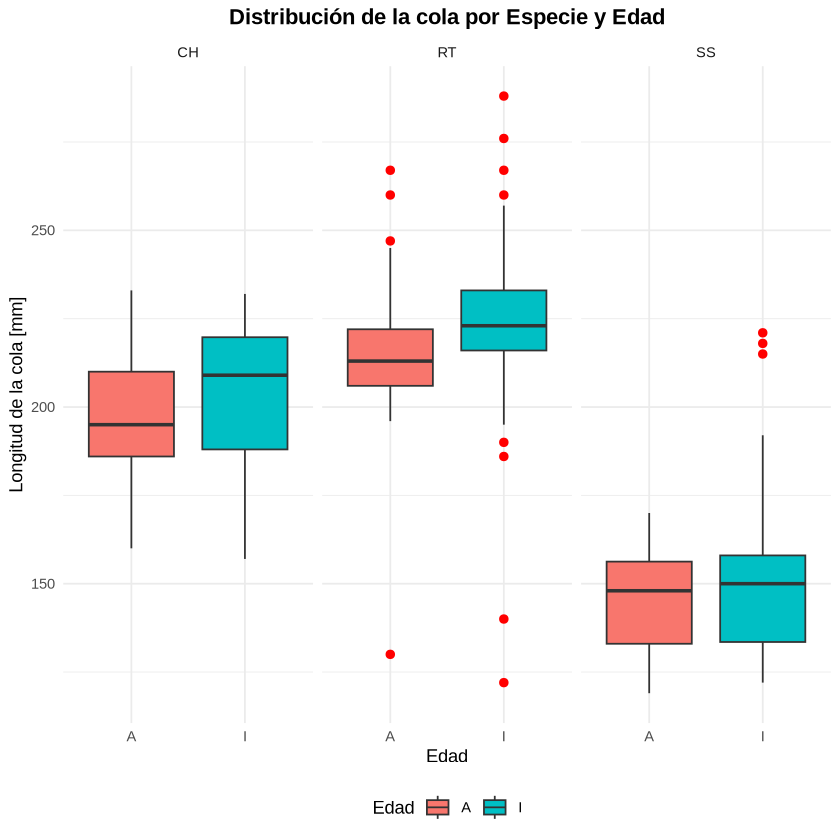

In [23]:
ggplot(ds_halcon_correcto, aes(x = Age, y = Wing, fill = Age)) +
  
  geom_boxplot(
    outlier.color = "red",
    outlier.size = 2,
    na.rm = FALSE 
  ) +
  
  facet_wrap(~ Species) +
  
  labs(
    title = "Distribución del Ala [mm] por Especie y Edad",
    x = "Edad", 
    y = "Longitud del ala [mm]",
    fill = "Edad" 
  ) +
  
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "bottom"
  )
ggplot(ds_halcon_correcto, aes(x = Age, y = Tail, fill = Age)) +
  
  geom_boxplot(
    outlier.color = "red",
    outlier.size = 2,
    na.rm = FALSE 
  ) +
  
  facet_wrap(~ Species) +
  
  labs(
    title = "Distribución de la cola por Especie y Edad",
    x = "Edad", 
    y = "Longitud de la cola [mm]",
    fill = "Edad" 
  ) +
  
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "bottom"
  )

**Comentarios:**  

Ahora observo que, al separar por edad (adultos e inmaduros), se explica mejor la variabilidad de los datos, ya que las cajas son más anchas.  
Por lo que he investigado, es común que las aves jóvenes presenten una mayor variabilidad en sus primeras plumas (alas y colas).  

El grupo **RT** es bastante variable y es también el que presenta más *outliers*.  
Hacer la gráfica por sexo en este grupo no tiene mucho sentido, ya que solo hay tres individuos especificados como “F”.

**Tablas de contingencia en estas variables:**  

Como se trata de variables numéricas continuas, necesito crear una variable cualitativa para poder elaborar estas tablas.

In [24]:
ds_halcon_categorizado <- ds_halcon_correcto %>%
  mutate(
    #Crear variable para el Ala (Wing)
    Wing_Size = ifelse(Wing < median(Wing, na.rm = TRUE), "corta", "larga"),
    
    #Crear variable para la Cola (Tail)
    Tail_Size = ifelse(Tail < median(Tail, na.rm = TRUE), "corta", "larga"),
    
    #Convertir las nuevas variables a factor (categóricas)
    Wing_Size = as.factor(Wing_Size),
    Tail_Size = as.factor(Tail_Size)
  )


Creo la tabla de contingencia:

In [25]:
tabla_contingencia_tamaño <- table(
  "Tamaño_Ala" = ds_halcon_categorizado$Wing_Size,
  "Tamaño_Cola" = ds_halcon_categorizado$Tail_Size
)

tabla_contingencia_tamaño

          Tamaño_Cola
Tamaño_Ala corta larga
     corta   348    83
     larga    85   375

**Comentarios:**  

Se observa una correlación positiva fuerte: si las aves son grandes, son grandes (si tienen la cola grande, también tendrán el ala grande, y viceversa).  
Es algo bastante obvio.  

Vamos a verlo por especies:

In [26]:
ds_categorizado_por_especie <- ds_halcon_correcto %>%
  group_by(Species) %>%
  mutate(
    Wing_Size = ifelse(Wing < median(Wing, na.rm = TRUE), "corta", "larga"),
    Tail_Size = ifelse(Tail < median(Tail, na.rm = TRUE), "corta", "larga")
  ) %>%
  ungroup()

# Tabla para CH
tabla_CH <- ds_categorizado_por_especie %>%
  filter(Species == "CH") %>%
  select(Wing_Size, Tail_Size) %>% 
  table()

# Tabla para RT
tabla_RT <- ds_categorizado_por_especie %>%
  filter(Species == "RT") %>%
  select(Wing_Size, Tail_Size) %>%
  table()

# Tabla para SS
tabla_SS <- ds_categorizado_por_especie %>%
  filter(Species == "SS") %>%
  select(Wing_Size, Tail_Size) %>% 
  table()

tabla_CH
tabla_RT
tabla_SS

         Tail_Size
Wing_Size corta larga
    corta    29     5
    larga     5    30

         Tail_Size
Wing_Size corta larga
    corta   188    86
    larga    80   213

         Tail_Size
Wing_Size corta larga
    corta   114    12
    larga    13   116

En las epsecies CH y RT hay una correcalción positiva muy fuerte, mientras que en la RT es mas debil, parece que la especie "Red-tailed" tiene una diversidad dentro de la especie mucho mayor

### 3.- Analizad mediante un Scatterplot cómo se relacionan ambas variables.

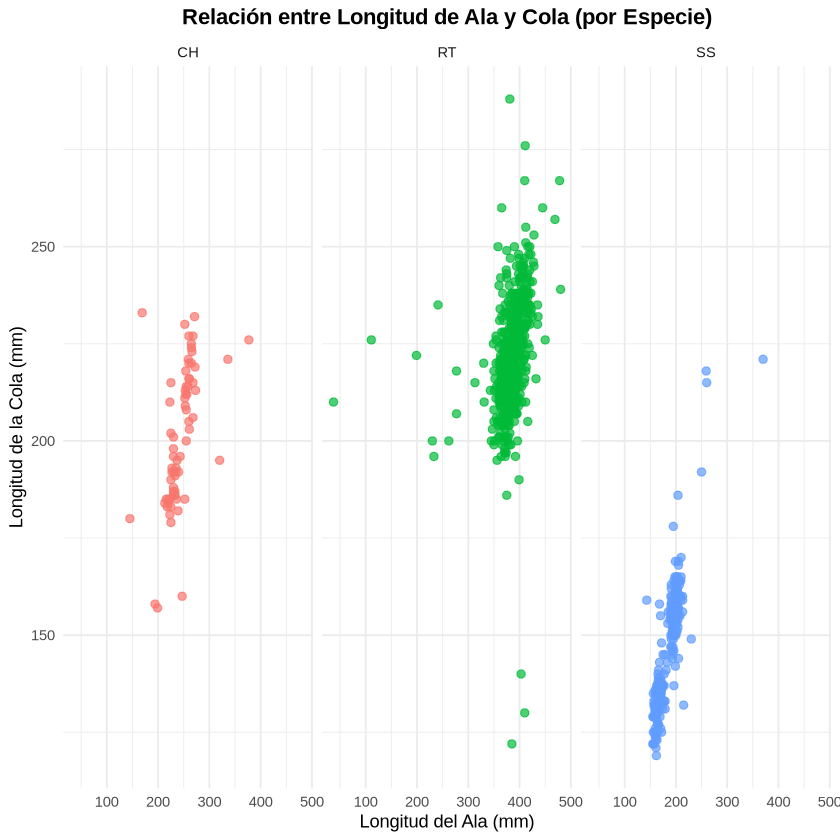

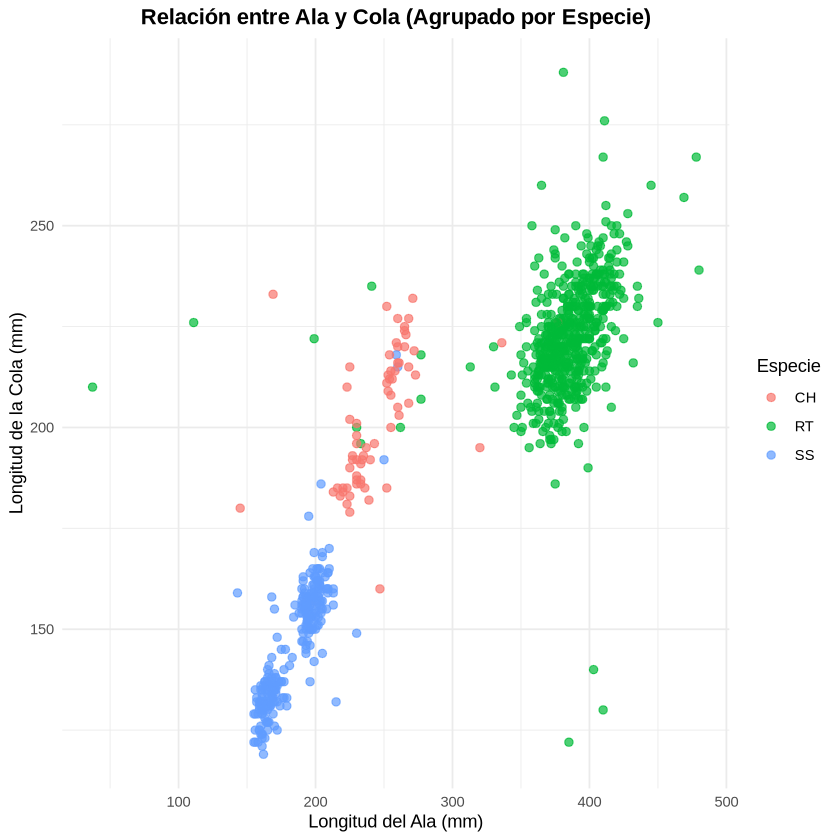

In [27]:
ggplot(ds_halcon_correcto, aes(x = Wing, y = Tail, color = Species)) +
  
  geom_point(
    alpha = 0.7,  
    size = 2      
  ) +
  
  
  facet_wrap(~ Species) +
  
  labs(
    title = "Relación entre Longitud de Ala y Cola (por Especie)",
    x = "Longitud del Ala (mm)",
    y = "Longitud de la Cola (mm)",
    color = "Especie" # 
  ) +
  
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "none" 
  )

ggplot(ds_halcon_correcto, aes(x = Wing, y = Tail, colour = Species)) +
  
  geom_point(
    alpha = 0.7, 
    size = 2
  ) +
   
  labs(
    title = "Relación entre Ala y Cola (Agrupado por Especie)",
    x = "Longitud del Ala (mm)",
    y = "Longitud de la Cola (mm)",
    colour = "Especie" 
  ) +
  
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

**Comentario**

Esto concuerda con lo que hemos estado diciendo durante esta práctica, y como hemos estado diciendo, los datos de la especie RT son mas dispersos, tambien puede que sea por que hay mas indivíduos.
Se observa tambien que hay muchos mas outlayers. puede que haya individuos de "RT" que esten mal clasificados.

Realmente estan bastante bien identificdadas las 3 especies sabiendo esto y según los datos de Longitud del alal y de la cola podriamos decir de que especia son. Si viniera un halcon sin especificar.

**RESUMEN**

**SS:** La especie mas pequeña en general.

**CH:** Mediano en general

**RT:** Tiene las alas drasticamente mas largas y la cola es de longitud media.